In [1]:
import pandas as pd          
import numpy as np          
import matplotlib.pyplot as plt  
import yfinance as yf       
%matplotlib inline
import warnings                   
warnings.filterwarnings("ignore")

In [2]:
# let us get some data. One thing to be careful about data is that  for reliability model should use similar condition data for example
#I cannot use a model trained on crisis data to predict normal market scenario stats. Let us begin after end of 2008 crisisdf=yf.download("RELIANCE.NS",,start="2011-01-01")
df=yf.download("SPY",start="2011-01-01")
df['returns']=df.Close.pct_change()
df['returns']=np.log1p(df['returns'])*100 # converting into continuously compounded returns in %
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2011-01-03,126.709999,127.599998,125.699997,127.050003,99.999390,138725200,NaN
2011-01-04,127.330002,127.370003,126.190002,126.980003,99.944305,137409700,-0.055111
2011-01-05,126.580002,127.720001,126.459999,127.639999,100.463776,133975300,0.518418
2011-01-06,127.690002,127.830002,127.010002,127.389999,100.267014,122519000,-0.196055
2011-01-07,127.559998,127.769997,126.150002,127.139999,100.070236,156034600,-0.196441


In [3]:
df.fillna(method='bfill',inplace=True)
df.head()    #cleaning data

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2011-01-03,126.709999,127.599998,125.699997,127.050003,99.999390,138725200,-0.055111
2011-01-04,127.330002,127.370003,126.190002,126.980003,99.944305,137409700,-0.055111
2011-01-05,126.580002,127.720001,126.459999,127.639999,100.463776,133975300,0.518418
2011-01-06,127.690002,127.830002,127.010002,127.389999,100.267014,122519000,-0.196055
2011-01-07,127.559998,127.769997,126.150002,127.139999,100.070236,156034600,-0.196441


In [4]:
df.index # already in DatetimeIndex form if not we could
#use df.index=pd.to_datetime(df.index)

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2023-09-22', '2023-09-25', '2023-09-26', '2023-09-27',
               '2023-09-28', '2023-09-29', '2023-10-02', '2023-10-03',
               '2023-10-04', '2023-10-05'],
              dtype='datetime64[ns]', name='Date', length=3211, freq=None)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

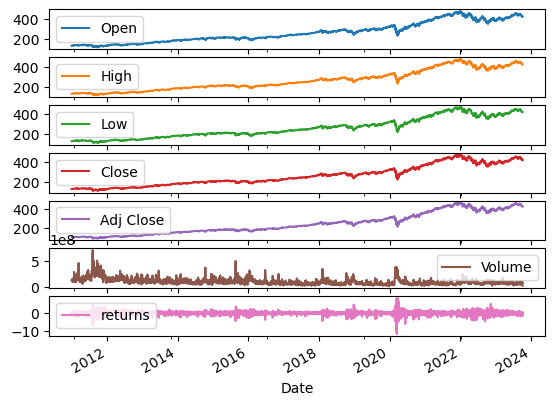

In [5]:
df.plot(subplots=True)

In [6]:
# returns looking very congested resampling it to downscale intomonthly data
df_monthly=df.resample("MS").mean() 

https://stackoverflow.com/questions/54840047/attributeerror-datetimeindexresampler-object-has-no-attribute-rolling

In [7]:
df_monthly.loc[df_monthly.index[0]:df_monthly.index[5]]

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2011-01-01,128.240001,128.730000,127.545000,128.270501,100.960034,1.430157e+08,0.060984
2011-02-01,131.972633,132.689473,131.489475,132.301580,104.132847,1.484249e+08,0.179724
2011-03-01,130.706087,131.420000,129.862175,130.641304,103.020352,2.081504e+08,-0.018324
2011-04-01,133.137000,133.661999,132.567501,133.193500,105.290286,1.406359e+08,0.142750
2011-05-01,134.124286,134.756190,133.345713,134.074284,105.986555,1.589337e+08,-0.053704
2011-06-01,129.041818,129.815454,128.222274,128.954545,102.168851,2.141106e+08,-0.099814


<Axes: xlabel='Date'>

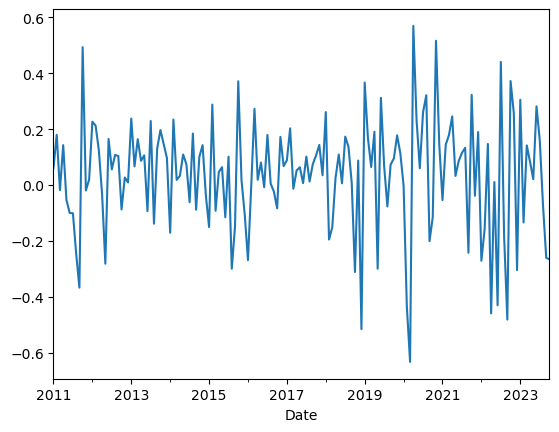

In [8]:
df=df_monthly
df["returns"].plot()

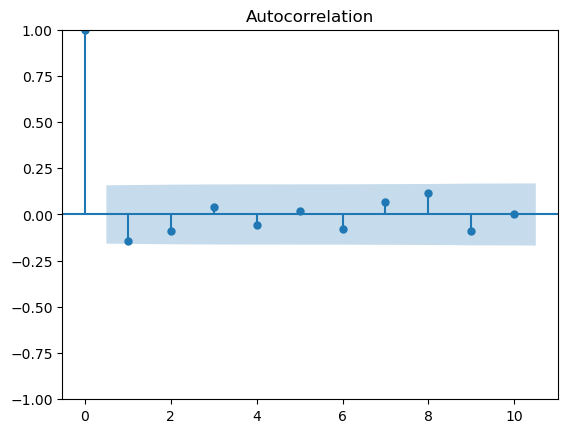

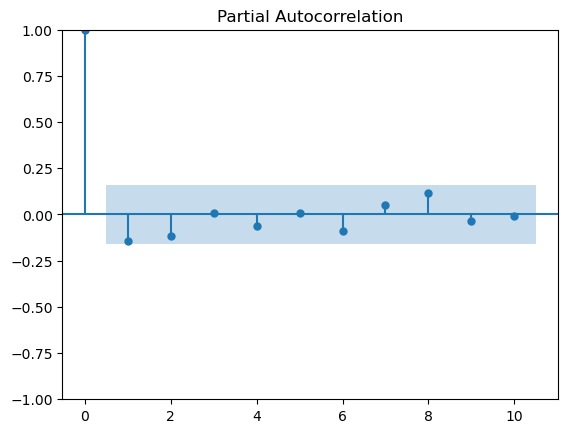

In [9]:
# from first look it looks like some seasonility is there but we will analyze that later
# lets us look at acf and pacf first
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df["returns"],lags=10)
plot_pacf(df["returns"],lags=10)
plt.show()



# Augmented dickey fuller test
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. In adf test the null hypothesis is that data is non stationary. If p value is smaller than our confidence level we may reject null hypothesis and
conclude that data is in fact stationary.So p value should be small.

In [10]:

from statsmodels.tsa.stattools import adfuller
result = adfuller(df['returns'])
print('Test Stat: {}\np value: {}'.format(result[0], result[1]))

Test Stat: -10.280558108321458
p value: 3.789496529909701e-18


In [11]:
# building arma models now
from statsmodels.tsa.arima.model import ARIMA
df.index = pd.DatetimeIndex(df.index).to_period('M')
model_ma1=ARIMA(df['returns'],order=(0,0,2))
ma1_results=model_ma1.fit()
ma1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  154
Model:                 ARIMA(0, 0, 2)   Log Likelihood                  30.682
Date:                Thu, 05 Oct 2023   AIC                            -53.364
Time:                        21:44:49   BIC                            -41.216
Sample:                    01-31-2011   HQIC                           -48.429
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0368      0.015      2.529      0.011       0.008       0.065
ma.L1         -0.1666      0.067     -2.504      0.012      -0.297      -0.036
ma.L2         -0.1046      0.073     -1.441      0.149      -0.247       0.038
sigma2         0.0393      0.004      9.486      0.000       0.031       0.047
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                35.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                            -0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
# but we might have overfitted our model so better to split it into training and test data
from sklearn.model_selection import train_test_split
train,test=train_test_split(df['returns'],test_size=0.2,shuffle=False)
model_ma2=ARIMA(train,order=(0,0,2))
ma2_results=model_ma2.fit()
ma2_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  123
Model:                 ARIMA(0, 0, 2)   Log Likelihood                  35.355
Date:                Thu, 05 Oct 2023   AIC                            -62.710
Time:                        21:44:49   BIC                            -51.461
Sample:                    01-31-2011   HQIC                           -58.141
                         - 03-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0439      0.013      3.428      0.001       0.019       0.069
ma.L1         -0.1506      0.071     -2.121      0.034      -0.290      -0.011
ma.L2         -0.2170      0.097     -2.244      0.025      -0.407      -0.027
sigma2         0.0329      0.003      9.835      0.000       0.026       0.039
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                65.49
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -1.16
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

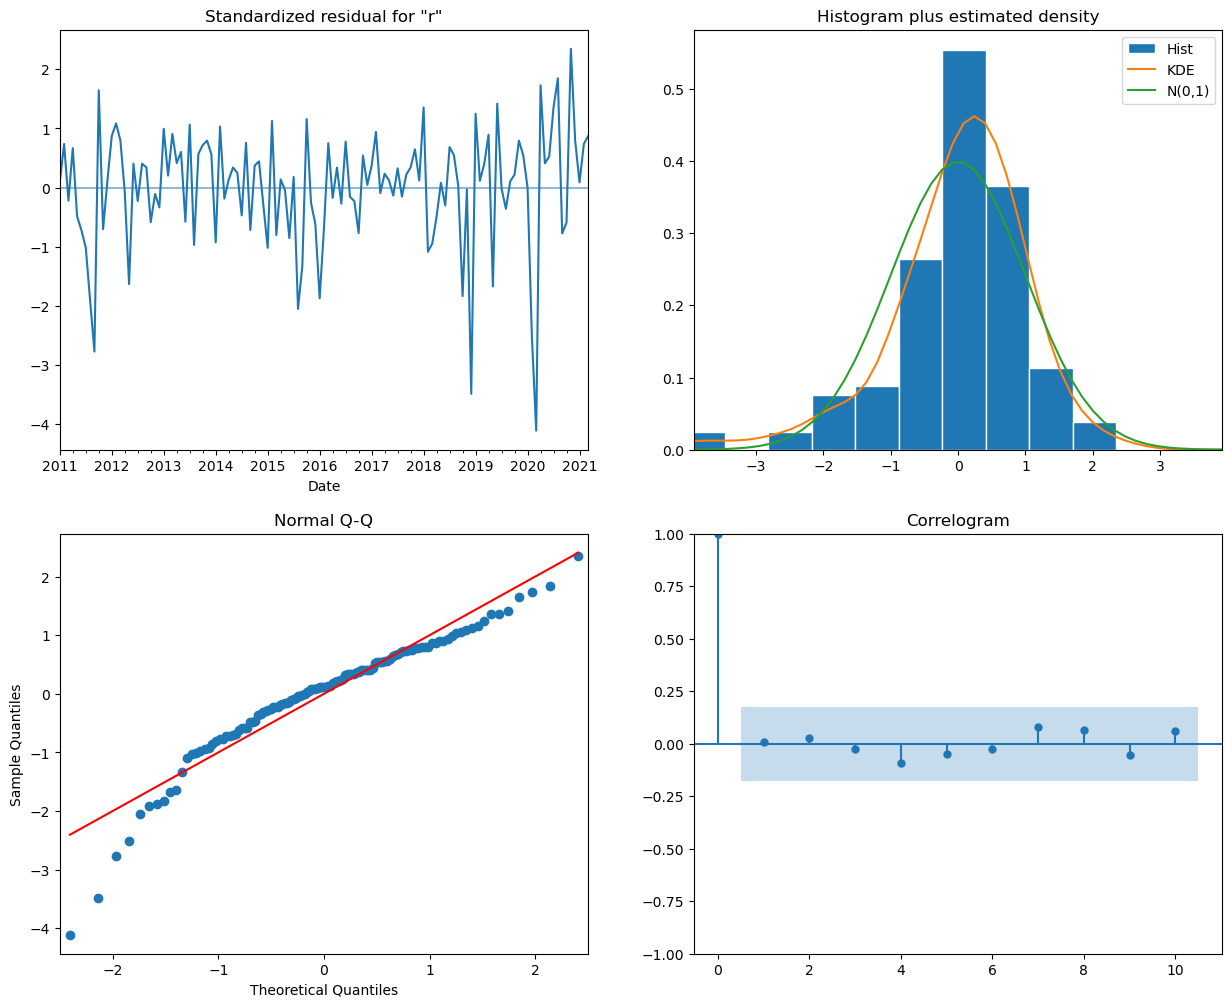

In [13]:
ma2_results.plot_diagnostics(figsize=(15, 12))
plt.show() # shows behavior of residuals over time it should be ensured that residuals resemble white noise

In [14]:
# now predicting test data values with it
start = len(train) 
end = len(train) + len(test) - 1
start



123

In [15]:
#let us plot the results

predictions=ma2_results.predict(start,end)
#predictions=pd.DataFrame(predictions,index=test.index,columns=['Prediction'])


pred=pd.DataFrame(predictions)
pred.set_index(test.index,inplace=True)# if gap in data it sets index same as test datset so easy to
#compare
pred.rename(columns={"predicted_mean":"prediction"},inplace=True)
pred


,prediction
Date,
2021-04,-0.008989
2021-05,0.009528
2021-06,0.043933
2021-07,0.043933
2021-08,0.043933
2021-09,0.043933
2021-10,0.043933
2021-11,0.043933
2021-12,0.043933


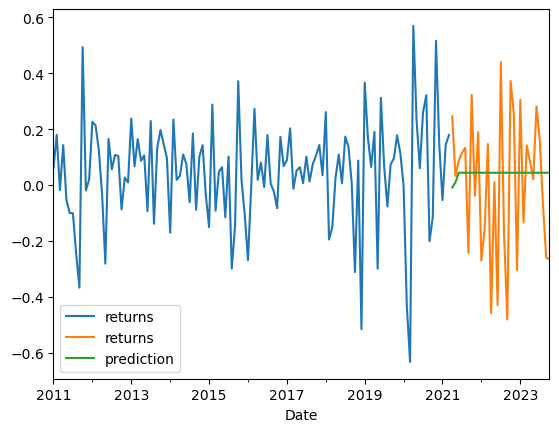

In [16]:
train.plot(legend=True)
test.plot(legend=True)
pred['prediction'].plot(legend=True)
plt.show()


In [17]:
df["returns"]=df["returns"].asfreq("M")

In [18]:
# data is monthly and may contain seasonal and holiday effects lets check by ETS analysis
# from statsmodels.tsa.seasonal import seasonal_decompose 
# ETS= seasonal_decompose(df["returns"], model = "add",period=12,extrapolate_trend=12)
# ETS.plot()

In [19]:
k=pd.DataFrame(df["returns"])
k.index

PeriodIndex(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
             '2011-07', '2011-08', '2011-09', '2011-10',
             ...
             '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07', '2023-08', '2023-09', '2023-10'],
            dtype='period[M]', name='Date', length=154)

In [20]:
# may be seasonal factors should be incorporated for best results
from pmdarima import auto_arima 
auto_arima(df['returns'],seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4,max_order=6).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  154
Model:               SARIMAX(0, 0, 1)   Log Likelihood                  29.958
Date:                Thu, 05 Oct 2023   AIC                            -53.916
Time:                        21:44:53   BIC                            -44.805
Sample:                    01-31-2011   HQIC                           -50.215
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0366      0.016      2.265      0.024       0.005       0.068
ma.L1         -0.1860      0.063     -2.951      0.003      -0.310      -0.062
sigma2         0.0397      0.004      9.597      0.000       0.032       0.048
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                30.29
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               2.91   Skew:                            -0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# based on above ouput we can create optimal SARIMAX model
model=SARIMAX(train,order=(1,0,0), seasonal_order = (0,0,0,12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  123
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  28.716
Date:                Thu, 05 Oct 2023   AIC                            -53.432
Time:                        21:44:54   BIC                            -47.807
Sample:                    01-31-2011   HQIC                           -51.147
                         - 03-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0423      0.061     -0.689      0.491      -0.163       0.078
sigma2         0.0367      0.004      9.612      0.000       0.029       0.044
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                25.09
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                            -0.63
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

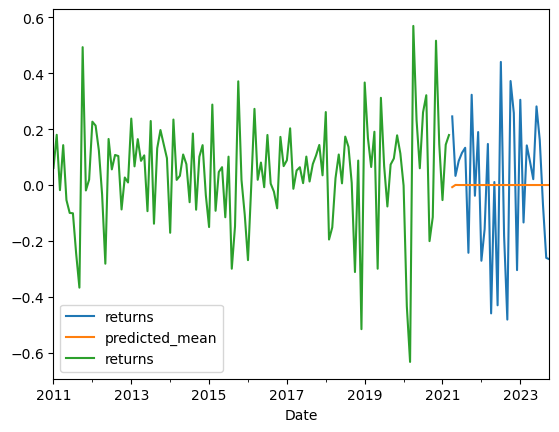

In [22]:
pred = result.predict(start = len(train), end = len(df)-1)
k=pd.DataFrame(pred,index=test.index)
test.plot(legend=True)
k['predicted_mean'].plot(legend=True)
train.plot(legend=True)

# forecast using prophet

In [23]:
from prophet import Prophet

In [28]:
df_pr=pd.DataFrame(df['returns'])
#ds_pr.reset_index(inplace=True)
# ds_pr.rename(columns={"Date":"ds"},inplace=True)
# ds_pr['ds']=pd.to_datetime(ds_pr['ds'])
df_pr['ds']=df_pr.index.astype(str)
df_pr['ds']=pd.to_datetime(df_pr['ds'])
df_pr.rename(columns={"returns":"y"},inplace=True)


In [35]:
train,test=train_test_split(df_pr,test_size=0.2,shuffle=False)
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=len(test),freq='M')
prophet_pred = m.predict(future)


01:08:27 - cmdstanpy - INFO - Chain [1] start processing
01:08:27 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
len(prophet_pred)

154

In [46]:
prophetpred=pd.DataFrame({"Pred" : prophet_pred[-len(test):]["yhat"]})
prophetpred.index=test.index
prophetpred.head()

,Pred
Date,
2021-04,0.154732
2021-05,0.052689
2021-06,0.073838
2021-07,0.139959
2021-08,0.036757


<Axes: xlabel='Date'>

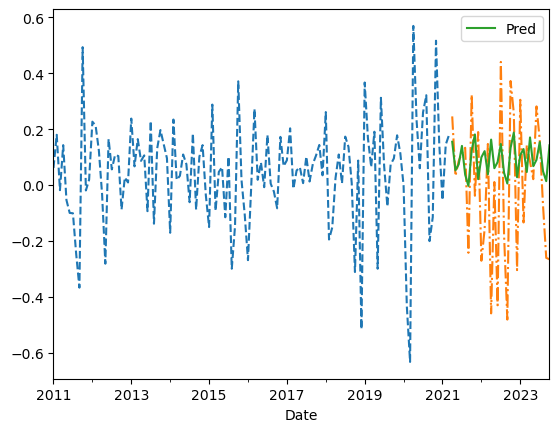

In [56]:
train['y'].plot(linestyle="--")
test['y'].plot(linestyle="-.")
prophetpred['Pred'].plot(linestyle="-",legend=True)